# Fibonacci and Golden Spiral Visualization

This notebook demonstrates how to visualize Fibonacci and Golden spirals using matplotlib.

## Configuration and Build

The first block configures the environment and compiles the Cython files to generate the necessary `.pyd` files.

## Import Libraries

The second block imports the required libraries and functions for plotting.

## Define Plotting Functions

The third block defines the function to plot the Fibonacci spiral with an example usage of 20 terms.

The fourth block defines the function to plot the Golden spiral with an example usage of 20 arcs.

## Combined Plot

The last block demonstrates how to plot both spirals on the same plot, showing three different plots with varying $n$ values (6, 10, 30).

### Observation

For the last set of plots, we observe that the two spirals become increasingly similar as $n$ increases. This is because as $n$ approaches infinity, the ratio of $fibonacci(n+1)$ to $fibonacci(n)$ approaches the golden ratio $\phi$, making the Fibonacci spiral closely match the Golden spiral.


In [2]:
import os
import subprocess

# Change directory to src and run the build command
os.chdir('src')
subprocess.run(['python', 'setup.py', 'build_ext', '--inplace'])
os.chdir('..')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from target.fibonacci import fibonacci_list

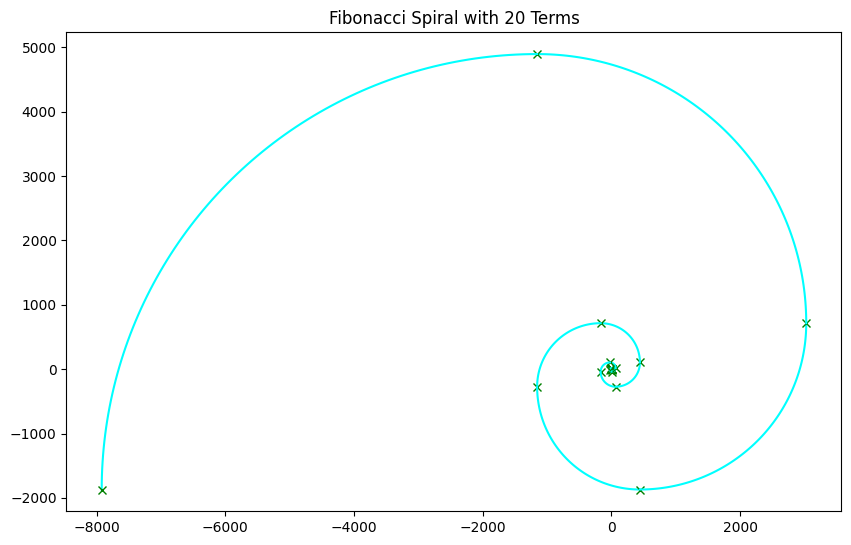

In [4]:
def plot_fibonacci_spiral(_ax, size: int, init: tuple[int,int]=(0,1)) -> None:
    # Generate Fibonacci sequence
    fib_sequence = fibonacci_list(size, n=1, init_vals=init)
    
    # Initialize starting point and direction
    x, y = 0, 0
    directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    # Plot Fibonacci spiral
    for i, fib in enumerate(fib_sequence):
        # Calculate new center for the arc
        new_center_x = x - directions[i % 4][0] * fib
        new_center_y = y - directions[i % 4][1] * fib
        
        # Calculate arc start and end angles
        theta = np.linspace(np.pi/2 * (i + 2), np.pi/2 * (i + 3), 100)
        
        # Calculate arc points
        arc_x = new_center_x + fib * np.cos(theta)
        arc_y = new_center_y + fib * np.sin(theta)
        
        # Plot the arc
        _ax.plot(arc_x, arc_y, color='cyan')
        
        # Update the starting point for the next arc
        x = new_center_x + directions[(i + 1) % 4][0] * fib
        y = new_center_y + directions[(i + 1) % 4][1] * fib
        _ax.plot(x, y, 'x', color='green')

# Create a new figure and axis
_, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Plot Fibonacci spiral with 20 terms on the axis
plot_fibonacci_spiral(ax, 20)

# Add a title
ax.set_title('Fibonacci Spiral with 20 Terms')

# Display the plot
plt.show()

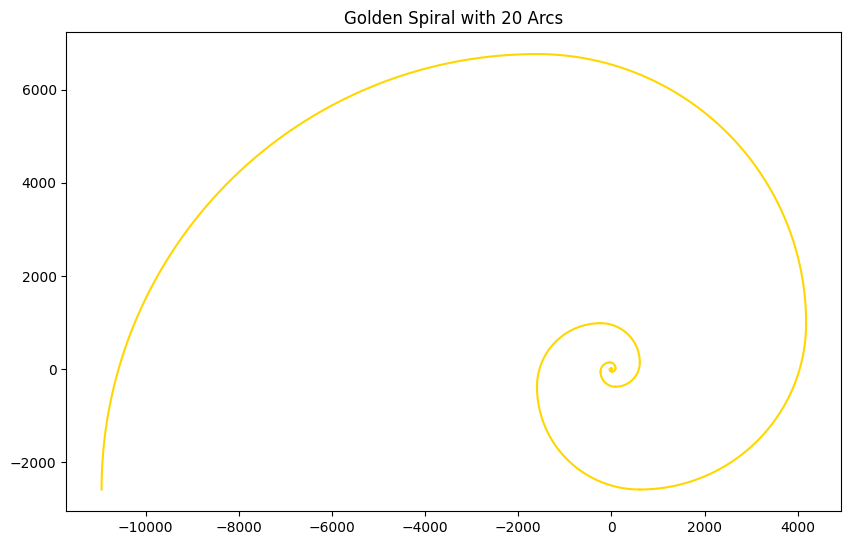

In [5]:
def plot_golden_spiral(_ax, num_arcs, r=1):
    # Golden ratio
    phi = (1 + np.sqrt(5)) / 2
    
    # Initialize starting point and direction
    x, y = 0, 0
    directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    for i in range(num_arcs):
        # Calculate new center for the arc
        new_center_x = x - directions[i % 4][0] * r
        new_center_y = y - directions[i % 4][1] * r
        
        # Calculate arc start and end angles
        theta = np.linspace(np.pi/2 * (i + 2), np.pi/2 * (i + 3), 100)
        
        # Calculate arc points
        arc_x = new_center_x + r * np.cos(theta)
        arc_y = new_center_y + r * np.sin(theta)
        
        # Plot the arc
        _ax.plot(arc_x, arc_y, color='gold')
        
        # Update the starting point for the next arc
        x = new_center_x + directions[(i + 1) % 4][0] * r
        y = new_center_y + directions[(i + 1) % 4][1] * r
        
        # Update the radius
        r *= phi

# Create a new figure and axis
_, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Plot Golden Spiral with 20 arcs on the axis
plot_golden_spiral(ax, 20)

# Add a title
ax.set_title('Golden Spiral with 20 Arcs')

# Display the plot
plt.show()

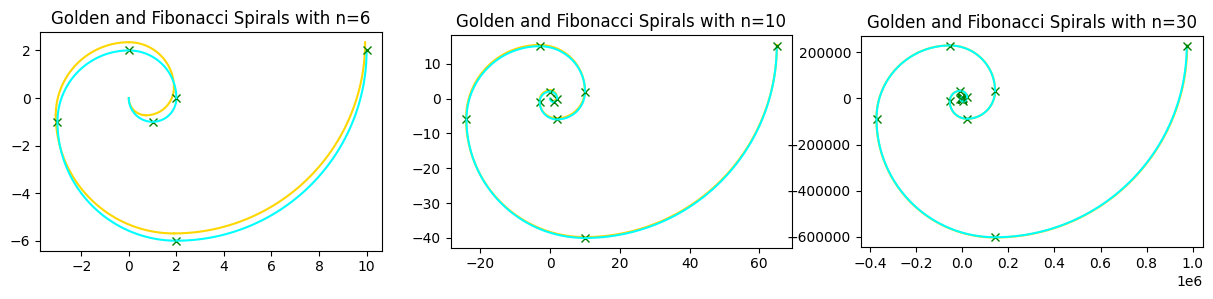

In [7]:
def plot_combined_spirals(n_fib, n_golden, _r_golden):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, n in enumerate(n_fib):
        ax = axes[i]
        ax.set_aspect('equal')
        
        # Plot Golden Spiral
        plot_golden_spiral(ax, n_golden[i], r=_r_golden)
        
        # Plot Fibonacci Spiral
        plot_fibonacci_spiral(ax, n)
        
        ax.set_title(f'Golden and Fibonacci Spirals with n={n}')

    plt.show()

# Define the different n values for Fibonacci Spiral
n_values_fib = [6, 10, 30]
# Define the corresponding n values and radii for Golden Spiral
n_values_golden = [6, 10, 30]
r_golden = 0.725

plot_combined_spirals(n_values_fib, n_values_golden, r_golden)